# Problem 1: Statistics, part 1

Below is a collection of exercises that you should now be able to complete after week  7.



In [1]:
# the following code guarantees you'll properly reload any modules that you custom-defined in your environment.
# you don't need to understand it.
# just run this once at the beginning.
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from mal_util import *
mal_fpath = os.path.join('csvs', 'myAnimeListDataset [07-05-2018].csv')
anime_headers, anime_studios, anime_sources, anime_dict = load_mal(mal_fpath)
anime_arr, anime_np_lookup = anime_array(anime_dict,  anime_studios, anime_sources) # convert into numpy array

print(anime_headers) # things
print('studios:', len(anime_studios), anime_studios[:10])
print(anime_sources)
print('example entry for Houseki no Kuni', anime_dict['Houseki no Kuni']) # ditionary format
np.set_printoptions(suppress=True) # remove scientific notation view
print(anime_np_lookup[0], anime_arr[0,:]) # np array format

['Anime ID', 'Season', 'Episodes', 'Studio', 'Source', 'Score', '# Ratings', '# Favorites']
studios: 301 ['10Gauge', '33 Collective', '3xCube', '8bit', 'A-1 Pictures', 'A-Real', 'A.C.G.T.', 'ACC Production', 'AIC', 'AIC A.S.T.A.']
['4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game', 'Light novel', 'Manga', 'Music', 'Novel', 'Original', 'Other', 'Picture book', 'Radio', 'Unknown', 'Visual novel', 'Web manga']
example entry for Houseki no Kuni [35557, 2017, 3, 12, 'Orange', '', 'Manga', 8.48, 51444, 127924]
Cowboy Bebop [     1.     1998.        1.       26.      248.       -1.        9.
      8.81 363889.   704490.  ]


## Exercise 1: Graphing sample means

Graph the distribution of 5000 sample means (sample size = 10) of the MAL ratings from a season of your choice.

Text(0.5,1,'Sample means of 5000 random anime scores.')

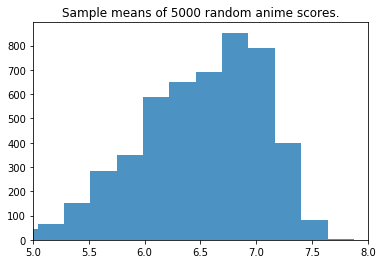

In [38]:
def mal_sample_means_season(sample_size, num_samples, season):
    season_int = int(season)
    if season_int > 3 or season_int < 0:
        return print('invalid season')
    sample_arr = np.zeros((num_samples, 3))
    season_col = anime_arr[:,SEASON].astype(int)
    anime_arr_season = anime_arr[season_col == season_int,:]
    num_elts = anime_arr_season.shape[0]
    for i in range(num_samples):
        inds = np.random.randint(num_elts, size=sample_size)
        sample = anime_arr_season[inds,SCORE]
        sample_arr[i, :] = (np.average(sample))
    return np.array(sample_arr)
    
sample_size = 10
num_samples = 5000
season = 2
sample_arr = mal_sample_means_season(sample_size, num_samples, season)
fig = plt.figure()
ax = plt.gca()
ax.hist(sample_arr[:,0],bins=20,alpha=0.8)
ax.set_xlim((5, 8))
ax.set_title('Sample means of 5000 random anime scores.')

## Exercise 2: Plotting histograms

Choose three different studios and sample 10 anime from each. Graph a histogram of the average score per studio and include error bars.

In [53]:
def make_studio_sample(sample_size, studio):
    
    studio_col = anime_arr[:,STUDIO]
    studio_arr = anime_arr[studio_col == studio,:]
    print(studio_arr)
    num_elts = studio_arr.shape[0]
    inds = np.random.randint(num_elts, size=sample_size)
    return studio_arr[inds, :]

print('sample of sample size 10:')
print(make_studio_sample(10, 'Studio Pierrot'))

sample of sample size 10:
[26. 26. 26. ...  0.  0.  0.]
[]


C:\Users\Tim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


ValueError: low >= high

## Exercise 3: t-test

For two different seasons of anime, report via results of the two-sided t-test if two anime seasons are significantly different in average MAL score.

In [ ]:
# your code here